<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Valor de la Unidad.xlsx to Valor de la Unidad.xlsx


In [120]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [121]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [122]:
FIN['Fecha'] = pd.to_datetime(FIN['Fecha'])
FTC['Fecha'] = pd.to_datetime(FTC['Fecha'])

In [ ]:
FIN.head()

In [ ]:
FTC.head()

Text(0.5, 0, 'Fecha')

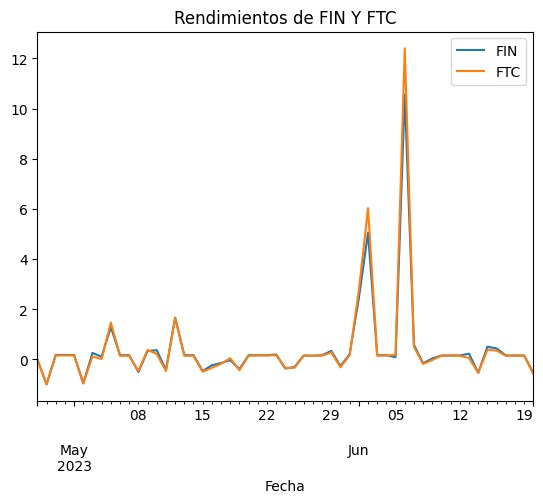

In [148]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')  # Rango de fechas mensuales
plt.legend(['FIN',"FTC"])
plt.xlabel('Fecha')

In [126]:
FIN.set_index('Fecha', inplace=True)

In [127]:
FTC.set_index('Fecha', inplace=True)

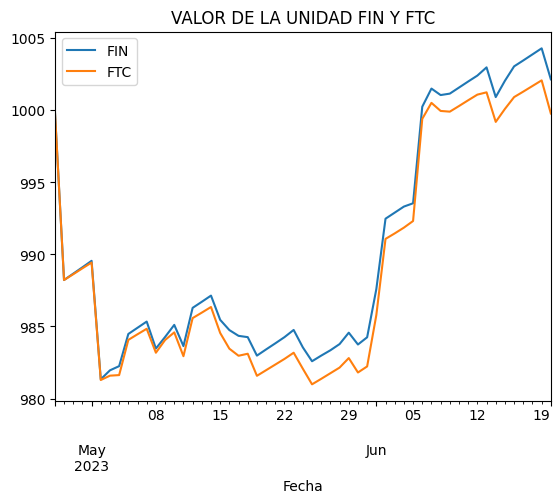

In [128]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')
plt.legend(['FIN',"FTC"])

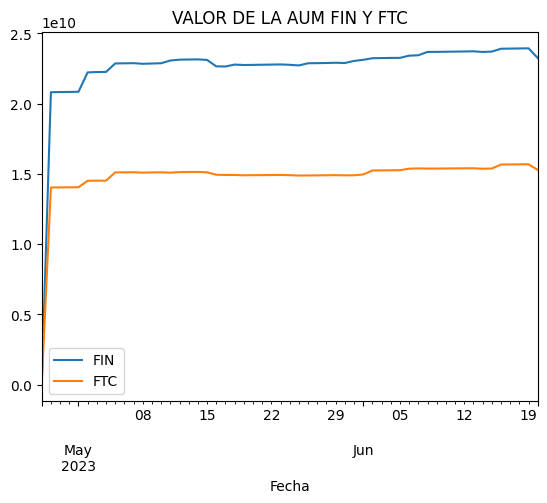

In [129]:
FIN['Valor Fondo'].plot()
FTC['Valor Fondo'].plot()
plt.title('VALOR DE LA AUM FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [ ]:
FIN['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

In [ ]:
FTC['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

In [132]:
nivel_confianza = 0.95

In [133]:
FIN['Valor Unidad'].head()

Fecha
2023-04-27    1000.00
2023-04-28     988.22
2023-04-29     988.66
2023-04-30     989.10
2023-05-01     989.55
Name: Valor Unidad, dtype: float64

In [ ]:
FIN['Rentab Diaria'].head()

In [ ]:
Retorno_FTC = FTC['Valor Fondo']*FTC['Rentab Diaria']
Retorno_FTC.head()

In [ ]:
Retorno_FIN = FIN['Valor Fondo']*FIN['Rentab Diaria']
Retorno_FIN.head()

In [137]:
var_FTC = np.percentile(Retorno_FTC, (1 - nivel_confianza) * 100)

In [138]:
var_FIN = np.percentile(Retorno_FIN, (1 - nivel_confianza) * 100)

# **VaR FTC**

In [139]:
var_formatted = "{:,.2f}".format(var_FTC).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -8.314.711.567,30


# **VaR FIN**

In [140]:
var_formatted = "{:,.2f}".format(var_FIN).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -12.549.446.056,69


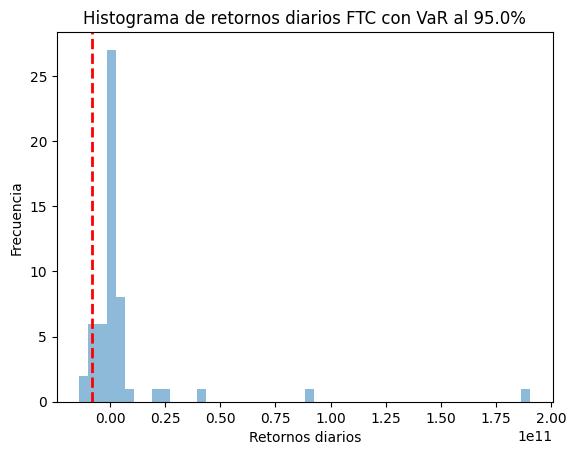

In [141]:
plt.hist(Retorno_FTC , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-142-c9d723731fc9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FTC, shade=True)


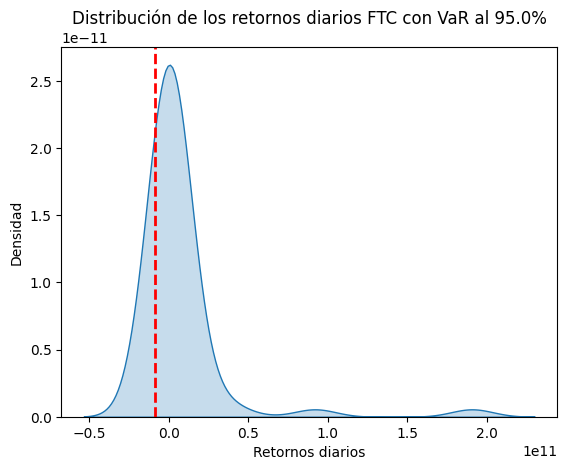

In [142]:
sns.kdeplot(Retorno_FTC, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

In [ ]:
plt.hist(Retorno_FIN , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-144-f91fb862fd29>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FIN, shade=True)


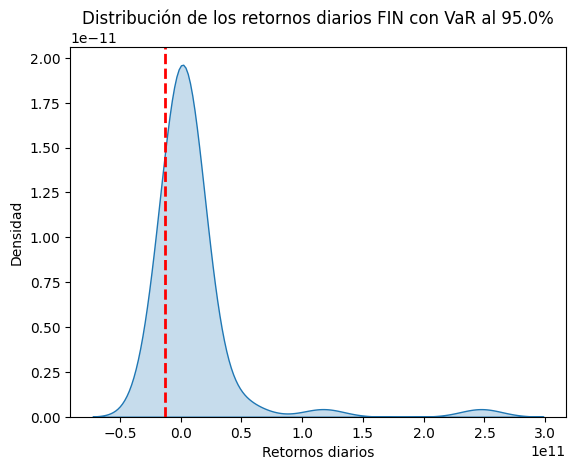

In [144]:
sns.kdeplot(Retorno_FIN, shade=True)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))
plt.show()